In [59]:
#Importing dependencies
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from lstm import *
import time
import matplotlib.pyplot as plt

In [60]:
#Step 1 Load Data
X_train, y_train, X_test, y_test =load_data('sp500.csv', 50,True)

In [61]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='adam')
print ('compilation time : ', time.time() - start)

compilation time :  0.028038501739501953


In [62]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 6s 2ms/step - loss: 0.0031 - val_loss: 0.0013


yo


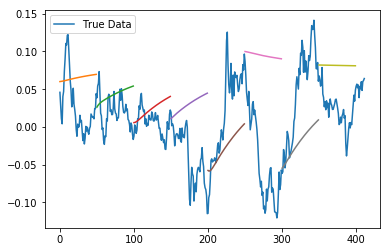

In [63]:
#Step 4 - Plot the predictions!
predictions = predict_sequences_multiple(model, X_test, 50, 50)
plot_results_multiple(predictions, y_test, 50)

In [64]:
error = 0
i = j = 0
for i in range(len(predictions) - 2):
    for j in range(len(predictions[i])):
        error = error + abs(predictions[i][j] - y_test[i*50 + j]) 
print("Error is :" , error , "%")
accuracy = (100 - error)
print("Accuracy is :" , accuracy ,"%" )

Error is : 18.15711407982869 %
Accuracy is : 81.84288592017131 %
